In [1]:
# Import the gyro project. This module is used to simulate, render, and plot the dynamic system
import pendulum

# Create an instance of the gyro simulator
sim = pendulum.Pendulum_sim(use_keyboard=False,
                            visualization=False)


In [2]:
# Set simulation parameters
starting_angle = 10.0
damping = 0.1

In [3]:
# Run the simulation
data = sim.run(starting_angle=starting_angle*0.01745,
               damping=damping,
               max_time=10.0)

In [4]:
# Extract simulation data
import numpy as np

# Extract time and torques
time = np.array(data['time'])
angle = np.array(data['angle']) * 180.0/np.pi
angle_vel = np.array(data['angle_vel']) * 180.0/np.pi

In [5]:
# Use a numerical integrator and the linear approximation of pendulum dynamics to get an estimated trajectory
theta = lambda t : starting_angle * np.cos(np.sqrt(9.81/1.0) * t)
theta_dot = lambda t : -np.sqrt(9.81/1.0) * starting_angle * np.sin(np.sqrt(9.81/1.0) * t)
est_angle = theta(time)
est_angle_vel = theta_dot(time)

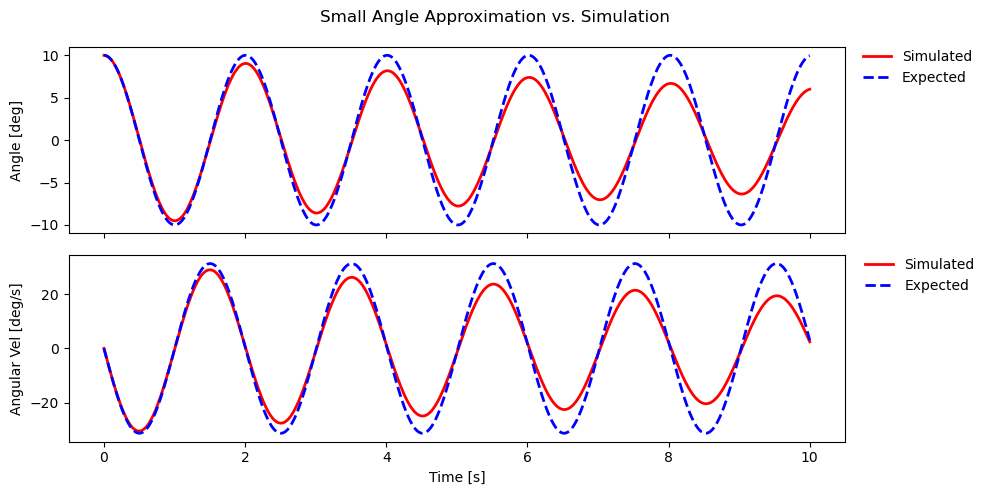

In [10]:
# Plot simulation data
import matplotlib.pyplot as plt

# Create the plot
fig, axes = plt.subplots(ncols=1, nrows=2, sharex=True, figsize=(10,5))

# Plot the torques
axes[0].plot(time, angle, c='r', lw=2, label='Simulated')
axes[0].plot(time, est_angle, c='b', lw=2, ls="--", label='Expected')
axes[0].set_ylabel("Angle [deg]")
axes[0].legend(bbox_to_anchor=(1.18, 1.05), frameon=False)

# Plot the accelerations
axes[1].plot(time, angle_vel, c='r', lw=2, label='Simulated')
axes[1].plot(time, est_angle_vel, c='b', lw=2, ls="--", label='Expected')
axes[1].set_xlabel("Time [s]")
axes[1].set_ylabel("Angular Vel [deg/s]")
axes[1].legend(bbox_to_anchor=(1.01, 1.05), frameon=False)
fig.suptitle("Small Angle Approximation vs. Simulation")
plt.tight_layout()

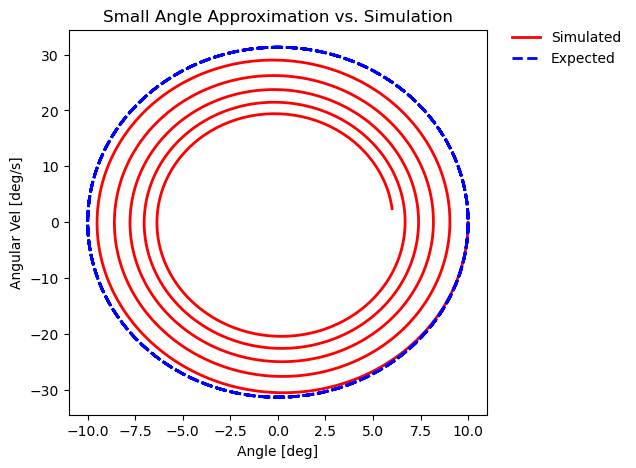

In [9]:
# Create the plot
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(5.4,5))

# Plot the torques
ax.set_title("Small Angle Approximation vs. Simulation")
ax.plot(angle, angle_vel, c='r', lw=2, label='Simulated')
ax.plot(est_angle, est_angle_vel, c='b', lw=2, ls="--", label='Expected')
ax.set_xlabel("Angle [deg]")
ax.set_ylabel("Angular Vel [deg/s]")
ax.legend(bbox_to_anchor=(1.35, 1.03), frameon=False)